In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to python environment

In [2]:
data=pd.read_excel(r"C:\Users\Sourav Balan\Downloads\iris (2).xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.shape

(150, 5)

# 2. Do the necessary pre-processing steps

In [8]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
for i in['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].mean())

In [11]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# 3. Find out which classification model gives the best result 

Logistic Regression

In [12]:
x=data.drop('Classification',axis=1)
y=data['Classification']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

C:\Users\Sourav Balan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.metrics import accuracy_score

print(' The accuracy of logistic regression is',accuracy_score(y_test,y_pred))

 The accuracy of logistic regression is 0.9777777777777777


kNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=range(1,10)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(x_train,y_train)
    y_pred_kNN=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

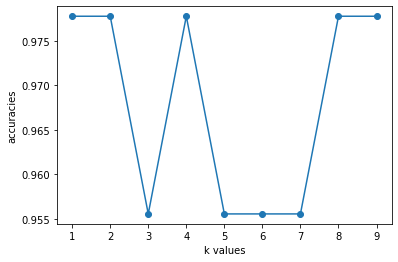

In [21]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid
plt.show()

In [23]:
classifier=KNeighborsClassifier(n_neighbors=4)
classifier=classifier.fit(x_train,y_train)
y_pred_kNN=classifier.predict(x_test)
print(' The accuracy of kNN is',accuracy_score(y_test,y_pred_kNN))

 The accuracy of kNN is 0.9777777777777777


SVM

In [24]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear')
svm_clf=svm_clf.fit(x_train,y_train)
y_pred_svm=svm_clf.predict(x_test)
print(' The accuracy of SVM is:',accuracy_score(y_test,y_pred_svm))

 The accuracy of SVM is: 1.0


In [25]:
svm_clf=SVC(kernel='rbf')
svm_clf=svm_clf.fit(x_train,y_train)
y_pred_svm=svm_clf.predict(x_test)
print(' The accuracy of SVM is:',accuracy_score(y_test,y_pred_svm))

 The accuracy of SVM is: 0.9777777777777777


Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [27]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)
print(' The accuracy of Decision tree is:',accuracy_score(y_test,y_pred_dt))

 The accuracy of Decision tree is: 1.0


Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)
print(' The accuracy of Random forest is:',accuracy_score(y_test,y_pred_rf))

 The accuracy of Random forest is: 1.0


# All the models are giving a good accuracy.